In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('./data/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [3]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

num = 0
den = 0

for i in range(n):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    den += (X[i] - mean_x) ** 2

b1 = num / den
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

0.26342933948939945 325.57342104944223


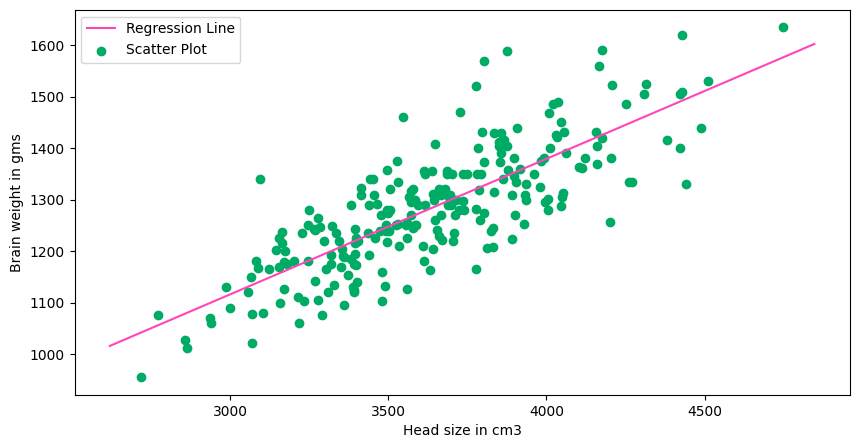

In [5]:
from cProfile import label


max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, num = 1000)
y = b0 + b1 * x


plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.plot(x, y, c='#fe46b8', label = 'Regression Line', )
plt.scatter(X, Y, c='#00ab66', label = 'Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in gms')
plt.legend()
plt.show()

In [6]:
ss_t = 0
ss_r = 0

for i in range(n):
    y_hat = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_hat) ** 2

R2 = 1 - (ss_r / ss_t)
print(R2) 

0.6393117199570003


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n,1))

reg = LinearRegression()

reg = reg.fit(X,Y)

Y_pred = reg.predict(X)

r2_score = reg.score(X,Y)

print(r2_score)

0.639311719957


(1000,)

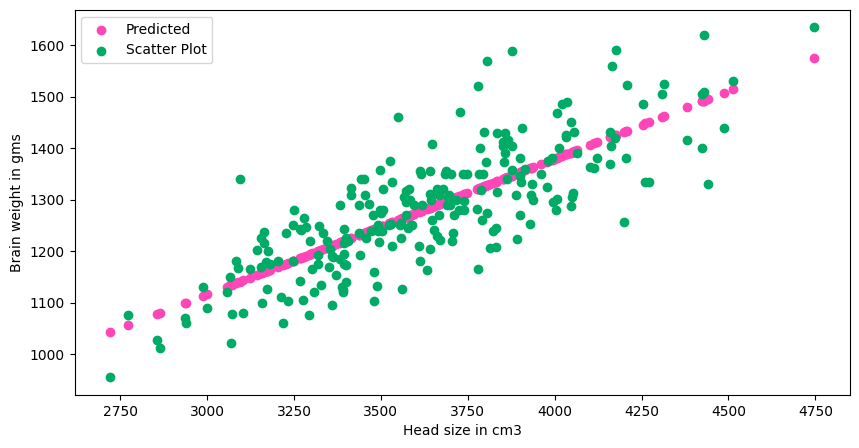

In [11]:
plt.scatter(X, Y_pred, c='#fe46b8', label = 'Predicted', )
plt.scatter(X, Y, c='#00ab66', label = 'Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in gms')
plt.legend()
plt.show()